<center> <h1 style="background-color:green"><br> Part 1: Understanding the Fundamentals <br></h1></center>


* [Deep Residual Learning for Image Recognition 2015 Paper](https://arxiv.org/pdf/1512.03385.pdf)



# Residual Block

* In traditional neural networks, each layer feeds into next layer

In a network with `residual blocks`
* each layer feeds into next layer and directly into layers about 2–3 hops away this is all about residual concep

## Understanding intuition behind Residual Block:

1. Why Residual Block was required in first place?
2. Why it is so important? 
3. How similar it looks to some other state-of-the-art architectures? 

Lets answer above questions


There are many interpretation of `Why residual blocks are awesome` and `How & Why they are one of key ideas that can make a neural network show state-of-the-art performances on a wide range of tasks`

We know 
* neural networks are Universal Function Approximators
* accuracy of NN increases with increasing number of layers 

There is a limit to number of layers added that results in an accuracy improvement <br>
If neural networks were universal function approximators, then they should have been able to learn any simple or complex function <br> 
Because of some problems like 
* `Vanishing Gradients`
* `Curse of Dimensionality`
If we have sufficiently deep networks, it may not be able to learn simple functions like an identity function

1. If we keep increasing number of layers, we will see that `accuracy will saturate at one point and eventually degrade`
    * This is usually not caused due to `overfitting` 

2. It might seem that `shallower networks are learning better than their deeper counterparts` 
    * In practice this is what was observed and is popularly known as **Degradation Problem**

In **`Degradation Problem`** we know that shallower networks perform better than deeper counterparts with few more layers added to them <br>
So, why not skip these extra layers and at least match accuracy of shallow sub-networks

**`How possible one can skip layers from training?`**

Training of few layers can be skipped using `Skip Connections` or *`Residual Connections`*

This is what you will see in above image
* We can directly learn an `identity function` by relying on `skip connections only`
* This is exact reason why `skip connections are also called identity shortcut connections` 
    * `skip connections` or `identity shortcut connections` is One solution for all problems

**`Why we are calling Skip Connections also Residual Connections?`**

Lets answer 
1. `Why call it Residual?` 
2. `Where is Residue?`

Consider a neural network block with input as $x$ <br>
We would like to `learn true distribution` --> $f(x)$

Let us denote `Residual` or `difference` between this as:

$$R(x) = output - input$$
$$R(x) = f(x) - x $$

rearanging above equation:
$$f(x) = R(x) + x$$

$f(x)$ ==> True Output

$R(x)$ ==> Residual 

Our `Residual Block is overall trying to learn true output` --> $f(x)$

Look closely at above image
* we have an identity connection coming as $x$
* layers are actually trying to learn `Residual` --> $R(x)$

**`Concluding:`** <br>

* Layers in a traditional network are learning true output --> $f(x)$
* Layers in a Residual Network(ResNet) are learning residual --> $R(x)$, hence name : Residual Block

It is also Observed that:
* it is easier to learn residual of output and input, rather than only input
* in addition, network can now learn identity function by simply setting residual as zero 

In backpropagation, problem of `Vanishing Gradient` arises with increasing number of layers
* because of these `skip connections` we can propagate larger gradients to initial layers
* these layers also could learn as fast as final layers which giving us `ability to train deeper networks`

Lets see **`How to arrange Residual Block and Identity Connections for optimal gradient flow`**
* It is Observed that `Pre-activations with Batch Normalizations generally give best results` 
    * see `right-most residual block in image`, this will gives most promising results
    
![res](res.png)

<center>Above Image contain Types of Residual Block</center>

**`BN`** => batch normalization

While training ResNets
* we either `train layers in residual blocks` or 
* `Skip training for those layers using skip connections`

Different parts of networks will be trained at different rates for different training data points `based on how error flows backward in network`

This can be thought of as training an ensemble of different models on dataset and getting best possible accuracy


In general
* We do not know `optimal number of layers` (or residual blocks) required for a neural network which might depend on complexity of dataset 
* Instead of treating `number of layers as an important hyperparameter to tune`
    * by adding `skip connections to our network`, we are allowing network to skip training for layers that are 
        * not useful and 
        * do not add value in overall accuracy
* In a way, skip connections make our neural networks dynamic to tune number of layers during training optimally

* ResNet is an artificial neural network (ANN) of a kind that stacks residual blocks on top of each other to form a network
* Deep residual networks like `ResNet-50 model` is a kind of `CNN that is 50 layers deep` 
    * in 2015 ResNet was a solution to `vanishing gradient problem`
* ResNet incorporates identity shortcut connections which essentially skip the training of one or more layers — creating a residual block.

The authors then proposed an “optimized” residual block, adding an extension called a bottleneck. It would reduce the dimensionality in the first two CONV layers (1/4 of the filters learned in the final CONV layer) and then increase again during the final CONV layer. Here are two residual modules stacked on top of each other.

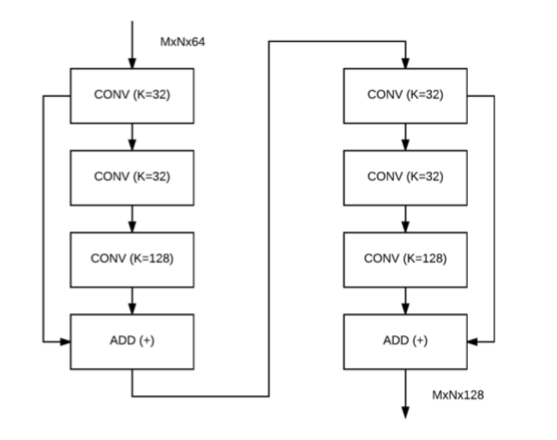

Finally a second paper on the residual module got published which was called **Identity Mapping in Deep Residual Networks** which provided an even better version of the residual block: the **pre-activation residual model** This allows the gradients to propagate through the shortcut connections to any of the earlier layers without any hindrance.

So instead of starting with a convolution (weight), we start with a series of (BN => RELU => CONV) * N layers (assuming bottleneck is being used). Then, the residual module outputs the addition operation that’s fed into the next residual module in the network (since residual modules are stacked on top of each other).


## What is Deep Residual Learning used for?

ResNet was created with the aim of tackling this exact problem. Deep residual nets make use of residual blocks to improve the accuracy of the models. The concept of “skip connections,” which lies at the core of the residual blocks, is the strength of this type of neural network.



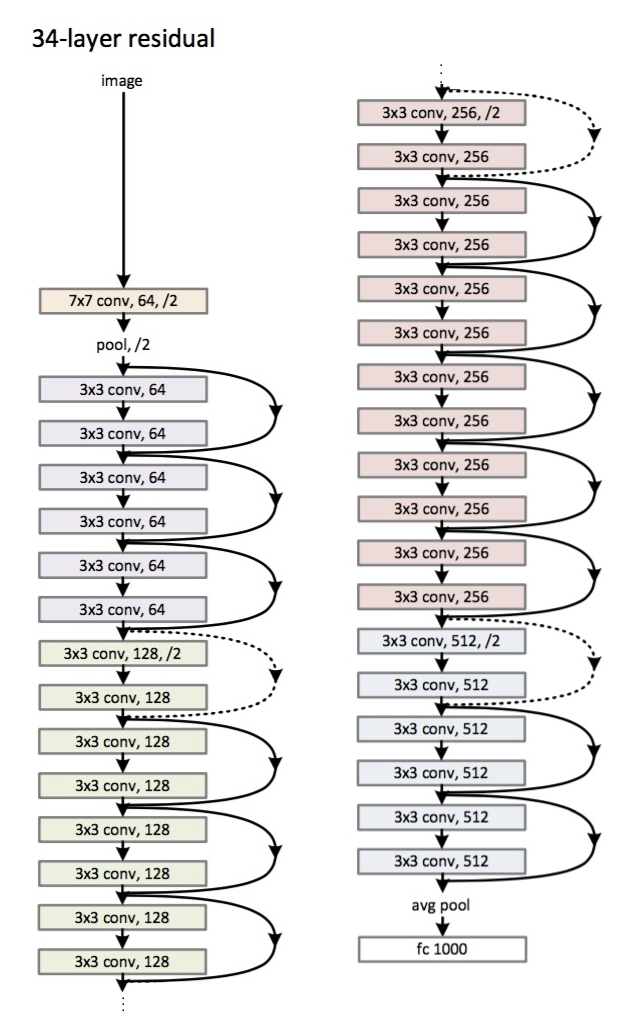

## ResNet-34 Architecture

The first ResNet architecture was the Resnet-34 which involved the insertion of shortcut connections in turning a plain network into its residual network counterpart. In this case, the plain network was inspired by VGG neural networks (VGG-16, VGG-19), with the convolutional networks having 3×3 filters. However, compared to VGGNets, ResNets have fewer filters and lower complexity. The 34-layer ResNet achieves a performance of 3.6 bn FLOPs, compared to 1.8bn FLOPs of smaller 18-layer ResNets.

It also followed two simple design rules –  the layers had the same number of filters for the same output feature map size, and the number of filters doubled in case the feature map size was halved in order to preserve the time complexity per layer. It consisted of 34 weighted layers.

The shortcut connections (Skip connections) were added to this plain network. While the input and output dimensions were the same, the identity shortcuts were directly used. With an increase in the dimensions, there were two options to be considered. The first was that the shortcut would still perform identity mapping while extra zero entries would be padded for increasing dimensions. The other option was to use the projection shortcut to match dimensions.


## Resnet-50 Architecture

While the Resnet50 architecture is based on the above model, there is one major difference. In this case, the building block was modified into a bottleneck design due to concerns over the time taken to train the layers. This used a stack of 3 layers instead of the earlier 2.

Therefore, each of the 2-layer blocks in Resnet34 was replaced with a 3-layer bottleneck block, forming the Resnet 50 architecture. This has much higher accuracy than the 34-layer ResNet model. The 50-layer ResNet achieves a performance of 3.8 bn FLOPS

## ResNet-101 and ResNet-152 Architecture

Large Residual Networks such as 101-layer ResNet101 or ResNet152 are constructed by using more 3-layer blocks. And even at increased network depth, the 152-layer ResNet has much lower complexity (at 11.3bn FLOPS) than VGG-16 or VGG-19 nets (15.3/19.6bn FLOPS

# Resnet50  : Residual Network on Custom Dataset

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

dataset_path = os.listdir('imagenet-object-localization-challenge/ILSVRC/Data/CLS-LOC/train2')

labels_type = os.listdir('imagenet-object-localization-challenge/ILSVRC/Data/CLS-LOC/train2')
#print (room_types)  #what kinds of rooms are in this dataset``

print("Total Labels Found: ", len(dataset_path))


Total Labels Found:  11


In [2]:

labels = []

for item in labels_type:
 # Get all the file names
 all_labels = os.listdir('imagenet-object-localization-challenge/ILSVRC/Data/CLS-LOC/train2' + '/' +item)


 # Add them to the list
 for label in all_labels:
    labels.append((item, str('imagenet-object-localization-challenge/ILSVRC/Data/CLS-LOC/train2' + '/' +item) + '/' + label))
   



In [3]:
    
# Build a dataframe        
data_df = pd.DataFrame(data=labels, columns=['labels type', 'image'])
#print(rooms_df.head())
#print(rooms_df.tail())


In [4]:

# Let's check how many samples for each category are present
print("Total number of rooms in the dataset: ", len(data_df))

labels_count = data_df['labels type'].value_counts()

#print("rooms in each category: ")
#print(room_count)

data_df.head(11)

Total number of rooms in the dataset:  14300


,labels type,image
0,n01491361,imagenet-object-localization-challenge/ILSVRC/...
1,n01491361,imagenet-object-localization-challenge/ILSVRC/...
2,n01491361,imagenet-object-localization-challenge/ILSVRC/...
3,n01491361,imagenet-object-localization-challenge/ILSVRC/...
4,n01491361,imagenet-object-localization-challenge/ILSVRC/...
5,n01491361,imagenet-object-localization-challenge/ILSVRC/...
6,n01491361,imagenet-object-localization-challenge/ILSVRC/...
7,n01491361,imagenet-object-localization-challenge/ILSVRC/...
8,n01491361,imagenet-object-localization-challenge/ILSVRC/...
9,n01491361,imagenet-object-localization-challenge/ILSVRC/...


In [5]:

import cv2
path = 'imagenet-object-localization-challenge/ILSVRC/Data/CLS-LOC/train2/'


im_size = 64

images = []
labels = []

for i in labels_type:
    data_path = path + str(i)  # entered in 1st folder and then 2nd folder and then 3rd folder
    filenames = [i for i in os.listdir(data_path) ]
   # print(filenames)  # will get the names of all images
    for f in filenames:
        img = cv2.imread(data_path + '/' + f)  # reading that image as array
        #print(img)  # will get the image as an array
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)
labels    

['n01491361',
 'n01491361',
 'n01491361',
 'n01491361',
 'n01491361',
 'n01491361',
 'n01491361',
 'n01491361',
 'n01491361',
 'n01491361',
 'n01491361',
 'n01491361',
 'n01491361',
 'n01491361',
 'n01491361',
 'n01491361',
 'n01491361',
 'n01491361',
 'n01491361',
 'n01491361',
 'n01491361',
 'n01491361',
 'n01491361',
 'n01491361',
 'n01491361',
 'n01491361',
 'n01491361',
 'n01491361',
 'n01491361',
 'n01491361',
 'n01491361',
 'n01491361',
 'n01491361',
 'n01491361',
 'n01491361',
 'n01491361',
 'n01491361',
 'n01491361',
 'n01491361',
 'n01491361',
 'n01491361',
 'n01491361',
 'n01491361',
 'n01491361',
 'n01491361',
 'n01491361',
 'n01491361',
 'n01491361',
 'n01491361',
 'n01491361',
 'n01491361',
 'n01491361',
 'n01491361',
 'n01491361',
 'n01491361',
 'n01491361',
 'n01491361',
 'n01491361',
 'n01491361',
 'n01491361',
 'n01491361',
 'n01491361',
 'n01491361',
 'n01491361',
 'n01491361',
 'n01491361',
 'n01491361',
 'n01491361',
 'n01491361',
 'n01491361',
 'n01491361',
 'n014

In [6]:
images=(np.array(images)).astype('float32') / 255.0
images

array([[[[0.15294118, 0.08235294, 0.03921569],
         [0.14901961, 0.09019608, 0.03921569],
         [0.18431373, 0.08235294, 0.04313726],
         ...,
         [0.13725491, 0.07450981, 0.05490196],
         [0.14901961, 0.05490196, 0.03137255],
         [0.10588235, 0.07450981, 0.02352941]],

        [[0.20784314, 0.07843138, 0.05098039],
         [0.18039216, 0.09019608, 0.05098039],
         [0.23529412, 0.09411765, 0.04705882],
         ...,
         [0.13725491, 0.0627451 , 0.03137255],
         [0.13333334, 0.07058824, 0.03529412],
         [0.1254902 , 0.05098039, 0.01568628]],

        [[0.40784314, 0.39607844, 0.3764706 ],
         [0.4627451 , 0.38431373, 0.36078432],
         [0.25490198, 0.09411765, 0.07058824],
         ...,
         [0.15294118, 0.0627451 , 0.03921569],
         [0.12156863, 0.0627451 , 0.01960784],
         [0.12156863, 0.05882353, 0.01568628]],

        ...,

        [[0.80784315, 0.7254902 , 0.62352943],
         [0.8745098 , 0.8156863 , 0.72156864]

In [7]:
images = images.astype('float32') / 255.0
images

array([[[[0.15294118, 0.08235294, 0.03921569],
         [0.14901961, 0.09019608, 0.03921569],
         [0.18431373, 0.08235294, 0.04313726],
         ...,
         [0.13725491, 0.07450981, 0.05490196],
         [0.14901961, 0.05490196, 0.03137255],
         [0.10588235, 0.07450981, 0.02352941]],

        [[0.20784314, 0.07843138, 0.05098039],
         [0.18039216, 0.09019608, 0.05098039],
         [0.23529412, 0.09411765, 0.04705882],
         ...,
         [0.13725491, 0.0627451 , 0.03137255],
         [0.13333334, 0.07058824, 0.03529412],
         [0.1254902 , 0.05098039, 0.01568628]],

        [[0.40784314, 0.39607844, 0.3764706 ],
         [0.4627451 , 0.38431373, 0.36078432],
         [0.25490198, 0.09411765, 0.07058824],
         ...,
         [0.15294118, 0.0627451 , 0.03921569],
         [0.12156863, 0.0627451 , 0.01960784],
         [0.12156863, 0.05882353, 0.01568628]],

        ...,

        [[0.80784315, 0.7254902 , 0.62352943],
         [0.8745098 , 0.8156863 , 0.72156864]

In [ ]:
np.save("data.npy", images)

In [4]:
images = np.load("data.npy")

In [7]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np

# Sample data (replace with your actual data)
y = data_df['labels type'].values

# Label Encoding
y_labelencoder = LabelEncoder()
y_encoded = y_labelencoder.fit_transform(y)  # Converts to integer labels

# Reshape for OneHotEncoder
y_reshaped = y_encoded.reshape(-1, 1)

# OneHot Encoding - Modern approach
onehotencoder = OneHotEncoder(sparse_output=False)  # sparse_output=False returns array instead of sparse matrix
Y = onehotencoder.fit_transform(y_reshaped)

print(Y.shape)  # Should show (n_samples, n_categories)

(14300, 11)


In [8]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


images, Y = shuffle(images, Y, random_state=1)

train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.05, random_state=415)

#inpect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(13585, 64, 64, 3)
(13585, 11)
(715, 64, 64, 3)
(715, 11)


In [9]:
import numpy as np
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

from keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow

from keras.initializers import glorot_uniform
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D

2025-04-26 18:24:56.859585: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-04-26 18:24:56.969953: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


![Images](ResNet.png)

# Identity Block

### what is meaning of padding='valid' and padding='same' ?

In convolutional neural networks (CNNs), **`padding`** determines how the input data is padded before applying convolution. Here's the key difference between `padding='valid'` and `padding='same'`:



### **1. `padding='valid'` (No Padding)**
- **Behavior**:
  - No padding is added to the input.
  - The convolution operates **only on valid positions** where the kernel fully overlaps with the input.
  - The output size is smaller than the input size.

- **Output Size Formula**:
  ```
  output_size = floor((input_size - kernel_size) / stride) + 1
  ```
  - Example: Input=5×5, Kernel=3×3, Stride=1 → Output=3×3.

- **When to Use**:
  - When you want to reduce spatial dimensions (downsampling).
  - Common in early layers of CNNs to shrink feature maps.



### **2. `padding='same'` (Zero Padding)**
- **Behavior**:
  - Pads the input with zeros **to ensure the output size equals the input size** (when stride=1).
  - Output dimensions are preserved (if `stride=1`).

- **Output Size Formula**:
  ```
  output_size = ceil(input_size / stride)
  ```
  - Example: Input=5×5, Kernel=3×3, Stride=1 → Output=5×5 (pads 1 pixel on each side).

- **Padding Calculation**:
  - Total padding added:
    ```
    pad_total = (kernel_size - 1)
    ```
  - Split equally on both sides (e.g., Kernel=3×3 → pad=1 on each side).

- **When to Use**:
  - When you want to **preserve spatial dimensions** (e.g., in deeper layers).
  - Useful for autoencoders or segmentation tasks.



### **Key Differences**
| Feature                | `padding='valid'`          | `padding='same'`           |
|------------------------|---------------------------|---------------------------|
| **Padding**            | None                      | Zero-padded               |
| **Output Size**        | Smaller than input        | Same as input (if stride=1) |
| **Information Loss**   | Loses edge information    | Preserves edges           |
| **Compute Efficiency** | Faster (less computation) | Slightly slower           |



### **Visual Example**
#### Input: 5×5, Kernel: 3×3, Stride: 1
- **`valid`**:
  ```
  Input: 5x5 → Output: 3x3 (no padding)
  ```
- **`same`**:
  ```
  Input: 5x5 → Output: 5x5 (pads with 1 zero on each side)
  ```

#### Code Example (TensorFlow/Keras):
```python
from tensorflow.keras.layers import Conv2D

# Valid padding (output shrinks)
conv_valid = Conv2D(filters=32, kernel_size=3, padding='valid')

# Same padding (output size = input size)
conv_same = Conv2D(filters=32, kernel_size=3, padding='same')
```



### **When to Choose Which?**
- Use **`valid`** to:
  - Reduce computational cost.
  - Gradually downsample feature maps (e.g., in VGG/ResNet).

- Use **`same`** to:
  - Preserve spatial resolution (e.g., U-Net for segmentation).
  - Avoid losing edge information.



### **Edge Cases**
- If `stride > 1`, `same` padding ensures:
  ```
  output_size = ceil(input_size / stride)
  ```
- For asymmetric padding (e.g., kernel=5×5), `same` adds 2 pixels on one side and 1 on the other.

In [10]:
# x is input, y=F(x)
# identity block simply means input should be equal to output. 
#  y = x + F(x)   the layers in a traditional network are learning the true output H(x)
# F(x) = y - x   the layers in a residual network are learning the residual F(x)
# Hence, the name: Residual Block.



def identity_block(X, f, filters, stage, block):
    """
   
    Arguments:
    X -- input of shape (m, height, width, channel)
    f -- shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    stage -- integer, used to name the layers, depending on their position in the network
    block -- string/character, used to name the layers, depending on their position in the network
    
    Returns:
    X -- output of the identity block, tensor of shape (n_H, n_W, n_C)
    """
    
    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Saving the input value.we need this later to add to the output. 
    X_shortcut = X
    
    # First component of main path
    X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2a')(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    
    # Second component of main path (≈3 lines)
    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b')(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path (≈2 lines)
    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c')(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation 
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    
    
    return X

# Convolutional Block

In [11]:

def convolutional_block(X, f, filters, stage, block, s = 2):
    
    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Save the input value
    X_shortcut = X


    # First layer 
    X = Conv2D(F1, (1, 1), strides = (s,s), name = conv_name_base + '2a')(X) # 1,1 is filter size
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)  # normalization on channels
    X = Activation('relu')(X)

      
    # Second layer  (f,f)=3*3 filter by default
    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b')(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)


    # Third layer
    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c')(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)


    ##### SHORTCUT PATH #### 
    X_shortcut = Conv2D(filters = F3, kernel_size = (1, 1), strides = (s,s), padding = 'valid', name = conv_name_base + '1')(X_shortcut)
    X_shortcut = BatchNormalization(axis = 3, name = bn_name_base + '1')(X_shortcut)

    # Final step: Add shortcut value here, and pass it through a RELU activation 
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    
    
    return X


# Creating ResNet 50 

![Resnet50](resnet50.png)

In [12]:
#Each ResNet block is either 2 layer deep
def ResNet50(input_shape=(64, 64, 3), classes=11):
    """
    Implementation of the ResNet50 architecture:
    CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> CONVBLOCK -> IDBLOCK*2 -> CONVBLOCK -> IDBLOCK*3
    -> CONVBLOCK -> IDBLOCK*5 -> CONVBLOCK -> IDBLOCK*2 -> AVGPOOL -> TOPLAYER

    """

    # Define the input as a tensor with shape input_shape
    X_input = Input(input_shape)

    # Zero-Padding
    X = ZeroPadding2D((3, 3))(X_input) #3,3 padding

    # Stage 1
    X = Conv2D(64, (7, 7), strides=(2, 2), name='conv1')(X) #64 filters of 7*7 
    X = BatchNormalization(axis=3, name='bn_conv1')(X) #batchnorm applied on channels
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X) #window size is 3*3

    # Stage 2
    X = convolutional_block(X, f=3, filters=[64, 64, 256], stage=2, block='a', s=1)
    # convolutional_block is a function defined above. Convolutional_block have 3 layers.
    #filters=[64, 64, 256] first 64 is for 1st layer and 2nd 64 is for 2nd layer and 256 is for 3rd layer of convultional block   
    # below are the conv layers from convolutional_block function
    #X = Conv2D(F1, (1, 1), strides = (s,s), name = conv_name_base + '2a')(X)
    #X = Conv2D(F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b')(X)
    #X = Conv2D(F3, (1, 1), strides = (s,s), name = conv_name_base + '2a')(X)
   
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b') 
    #X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2a')(X)
    #X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b')(X)
    #X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c')(X)
  
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')
    #X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2a')(X)
    #X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b')(X)
    #X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c')(X)


    ### START CODE HERE ###

    # Stage 3 
    X = convolutional_block(X, f = 3, filters = [128, 128, 512], stage = 3, block='a', s = 2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

    # Stage 4 
    X = convolutional_block(X, f = 3, filters = [256, 256, 1024], stage = 4, block='a', s = 2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

    # Stage 5 
    X = convolutional_block(X, f = 3, filters = [512, 512, 2048], stage = 5, block='a', s = 2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

    # AVGPOOL 
    X = AveragePooling2D((2,2), name="avg_pool")(X)

    ### END CODE HERE ###

    # output layer
    X = Flatten()(X)
    X = Dense(classes, activation='softmax', name='fc' + str(classes), kernel_initializer = glorot_uniform(seed=0))(X)
    
    
    # Create model
    model = Model(inputs = X_input, outputs = X, name='ResNet50')

    return model


In [13]:
model = ResNet50(input_shape = (64, 64, 3), classes = 11)

2025-04-26 18:25:22.150104: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-04-26 18:25:22.166009: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-04-26 18:25:22.166150: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-04-26 18:25:22.166771: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the

In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
model.summary()

Model: "ResNet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 70, 70, 3)   0           ['input_1[0][0]']                
                                                                                                  
 conv1 (Conv2D)                 (None, 32, 32, 64)   9472        ['zero_padding2d[0][0]']         
                                                                                                  
 bn_conv1 (BatchNormalization)  (None, 32, 32, 64)   256         ['conv1[0][0]']                  
                                                                                           

In [17]:
model.fit(train_x, train_y, epochs = 100, batch_size = 32) 

Epoch 1/100
425/425 [==============================] - 12s 28ms/step - loss: 1.3445 - accuracy: 0.5292
Epoch 2/100
425/425 [==============================] - 12s 28ms/step - loss: 1.1822 - accuracy: 0.5787
Epoch 3/100
425/425 [==============================] - 12s 28ms/step - loss: 1.2706 - accuracy: 0.5648
Epoch 4/100
425/425 [==============================] - 12s 28ms/step - loss: 1.2382 - accuracy: 0.5683
Epoch 5/100
425/425 [==============================] - 12s 28ms/step - loss: 1.1356 - accuracy: 0.5982
Epoch 6/100
425/425 [==============================] - 12s 28ms/step - loss: 1.1014 - accuracy: 0.6210
Epoch 7/100
425/425 [==============================] - 12s 28ms/step - loss: 0.9847 - accuracy: 0.6562
Epoch 8/100
425/425 [==============================] - 12s 28ms/step - loss: 0.9259 - accuracy: 0.6765
Epoch 9/100
425/425 [==============================] - 12s 28ms/step - loss: 0.8340 - accuracy: 0.7076
Epoch 10/100
425/425 [==============================] - 12s 28ms/step - l

In [18]:
preds = model.evaluate(test_x, test_y)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

23/23 [==============================] - 1s 17ms/step - loss: 2.9854 - accuracy: 0.6042
Loss = 2.985416889190674
Test Accuracy = 0.6041958332061768


In [ ]:
from matplotlib.pyplot import imread
img_path = 'imagenet-object-localization-challenge/ILSVRC/Data/CLS-LOC/train2/n01518878/n01518878_2.JPEG'

img = image.load_img(img_path, target_size=(64, 64))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print('Input image shape:', x.shape)
my_image = imread(img_path)
imshow(my_image)
print(model.predict(x))

Input image shape: (1, 64, 64, 3)


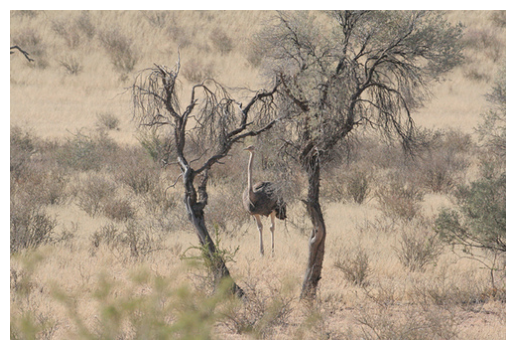

1/1 [==============================] - 1s 642ms/step
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image  # Correct import
from tensorflow.keras.applications.resnet50 import preprocess_input

img_path = 'imagenet-object-localization-challenge/ILSVRC/Data/CLS-LOC/train2/n01518878/n01518878_2.JPEG'

# Load and preprocess image (Keras way)
img = image.load_img(img_path, target_size=(64, 64))  # Now works!
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)  # Normalize for ResNet
print('Input image shape:', x.shape)

# Display the image (using matplotlib)
my_image = plt.imread(img_path)  # Alternative: Use Keras' img directly
plt.imshow(my_image)
plt.axis('off')
plt.show()

# Predict
print(model.predict(x))

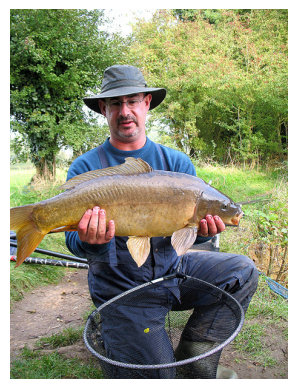

Input image shape: (1, 64, 64, 3)
1/1 [==============================] - 0s 15ms/step
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import preprocess_input

img_path = 'imagenet-object-localization-challenge/ILSVRC/Data/CLS-LOC/train2/n01440764/n01440764_18.JPEG'

# Load image (Matplotlib way)
my_image = plt.imread(img_path)
plt.imshow(my_image)
plt.axis('off')
plt.show()

# Manually preprocess to match Keras expectations
from PIL import Image
img = Image.fromarray(my_image).resize((64, 64))  # Resize
x = np.array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)  # Normalize
print('Input image shape:', x.shape)
print(model.predict(x))